# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key

# weather_api_key = "87d59f0a92e58e227419e9c78240ba60"


# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
# url = # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"

# HEre is where you api key will  go

geoapify_key = "3d2a42459ad47e9ba0aabcd8d099f0b9"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}q={city}&appid={geoapify_key}"
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract required fields from the JSON data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=egilsstadir&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 1 of Set 1 | egilsstadir
http://api.openweathermap.org/data/2.5/weather?q=belyy yar&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 2 of Set 1 | belyy yar
http://api.openweathermap.org/data/2.5/weather?q=talnakh&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 3 of Set 1 | talnakh
http://api.openweathermap.org/data/2.5/weather?q=afaahiti&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 4 of Set 1 | afaahiti
http://api.openweathermap.org/data/2.5/weather?q=dera bugti&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 5 of Set 1 | dera bugti
http://api.openweathermap.org/data/2.5/weather?q=port mathurin&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 6 of Set 1 | port mathurin
http://api.openweathermap.org/data/2.5/weather?q=isafjordur&appid=3d2a42459ad47e9ba0aabcd8d099f0b9

In [14]:
city_weather

{'cod': '404', 'message': 'city not found'}

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egilsstadir,65.2653,-14.3948,277.56,98,99,3.30,IS,1696359619
1,belyy yar,53.6039,91.3903,273.09,100,6,0.00,RU,1696359619
2,talnakh,69.4865,88.3972,271.88,92,100,8.34,RU,1696359620
3,afaahiti,-17.7500,-149.2833,300.08,85,5,8.39,PF,1696359620
4,dera bugti,29.0307,69.1510,300.56,8,0,2.28,PK,1696359620


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,277.56,98,99,3.30,IS,1696359619
1,belyy yar,53.6039,91.3903,273.09,100,6,0.00,RU,1696359619
2,talnakh,69.4865,88.3972,271.88,92,100,8.34,RU,1696359620
3,afaahiti,-17.7500,-149.2833,300.08,85,5,8.39,PF,1696359620
4,dera bugti,29.0307,69.1510,300.56,8,0,2.28,PK,1696359620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

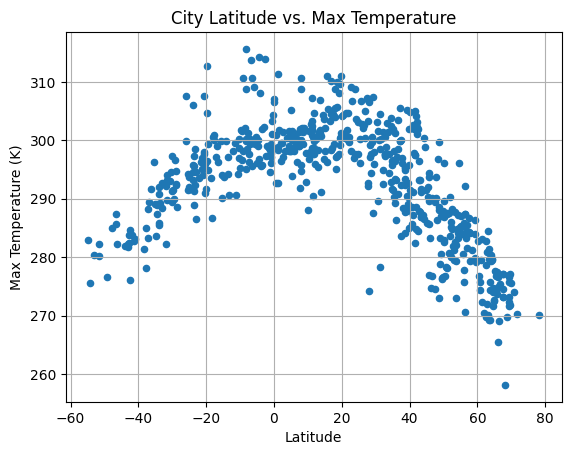

In [21]:

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

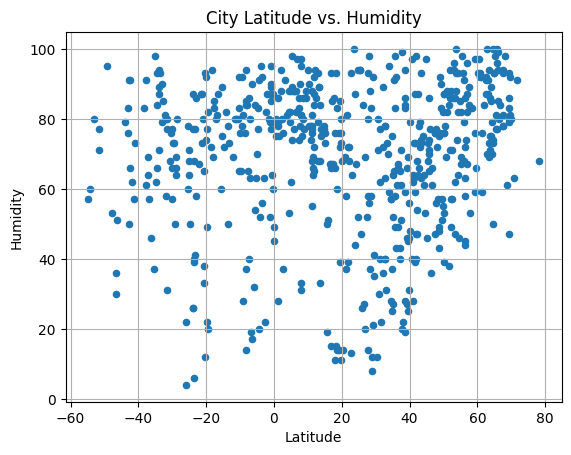

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Humidity')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

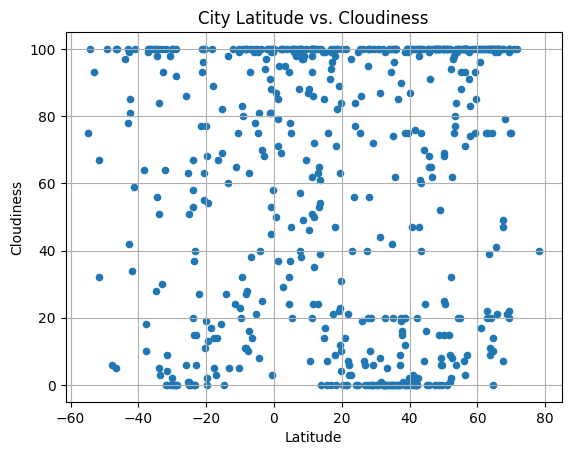

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

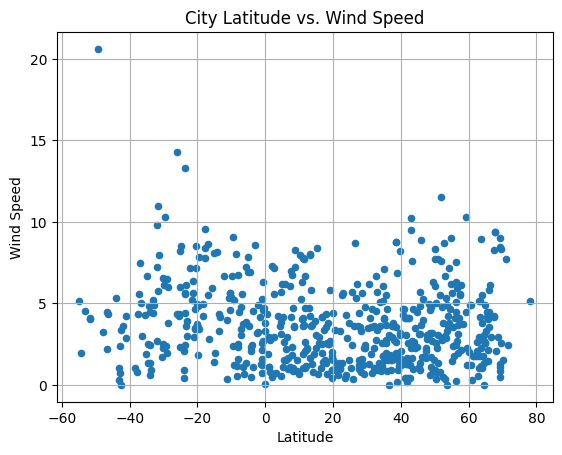

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
from scipy.stats import linregress


# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, title, x_label, y_label):


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create equation of line to calculate predicted values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, (10, 270), fontsize=12, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Show the plot
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,277.56,98,99,3.30,IS,1696359619
1,belyy yar,53.6039,91.3903,273.09,100,6,0.00,RU,1696359619
2,talnakh,69.4865,88.3972,271.88,92,100,8.34,RU,1696359620
4,dera bugti,29.0307,69.1510,300.56,8,0,2.28,PK,1696359620
6,isafjordur,66.0755,-23.1240,276.68,99,100,5.85,IS,1696359621


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,afaahiti,-17.7500,-149.2833,300.08,85,5,8.39,PF,1696359620
5,port mathurin,-19.6833,63.4167,296.50,77,2,3.53,MU,1696359621
7,port-aux-francais,-49.3500,70.2167,276.55,95,100,20.62,TF,1696359621
8,adamstown,-25.0660,-130.1015,293.67,71,51,8.23,PN,1696359622
9,avarua,-21.2078,-159.7750,295.18,73,100,5.66,CK,1696359622


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8066055132195891


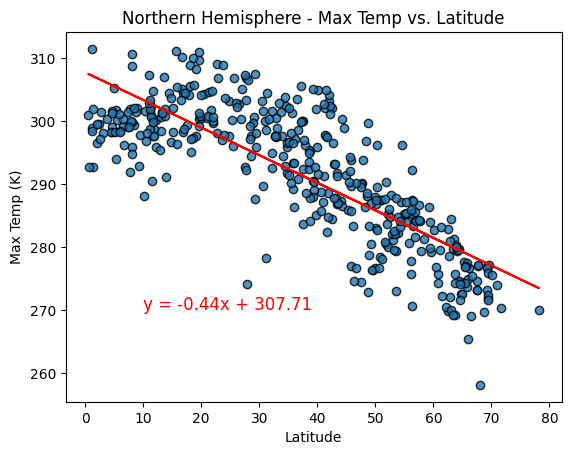

In [49]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Northern Hemisphere - Max Temp vs. Latitude", "Latitude", "Max Temp (K)")


The r-value is: 0.7771661710660034


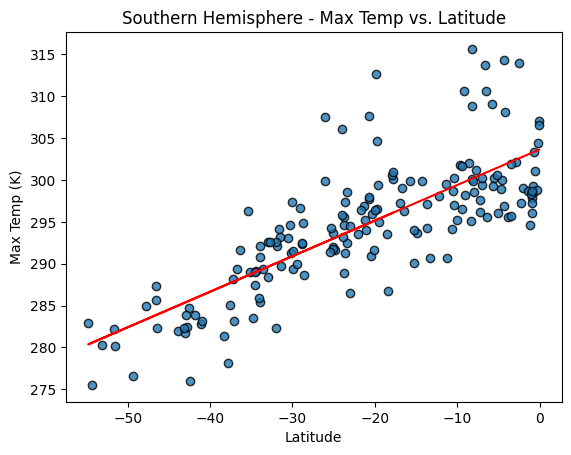

In [51]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Southern Hemisphere - Max Temp vs. Latitude", "Latitude", "Max Temp (K)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12242969935462203


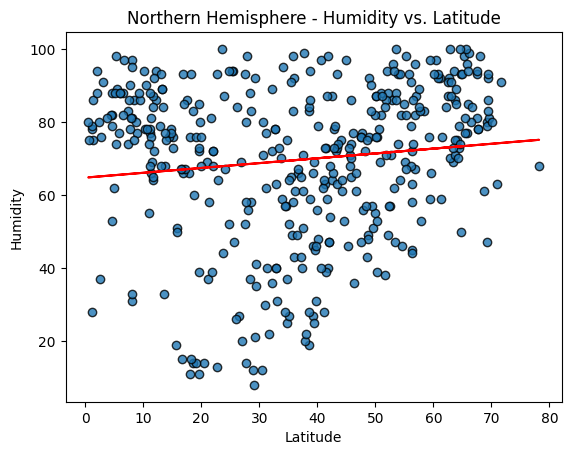

In [52]:
# Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Northern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity")


The r-value is: 0.02119862599979471


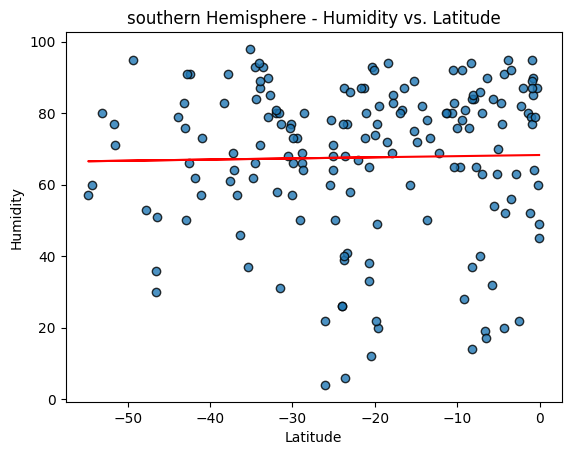

In [54]:
# Southern Hemisphere
# YOUR CODE HERE


plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "southern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05638000482978179


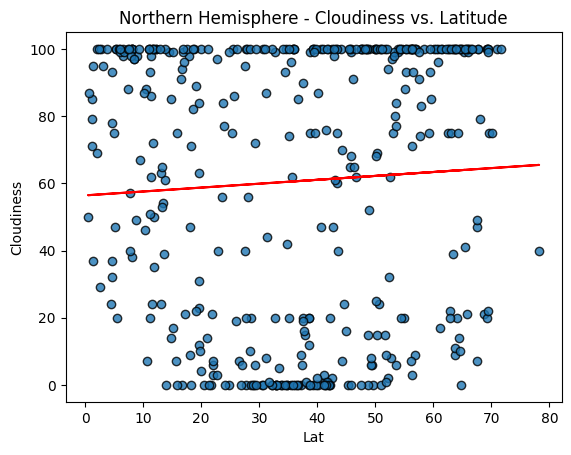

In [41]:
# Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Northern Hemisphere - Cloudiness vs. Latitude", "Lat", "Cloudiness", (10, 270))


The r-value is: 0.038049693797656756


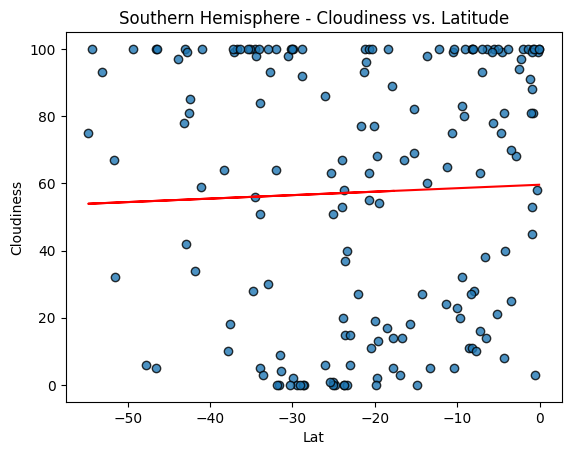

In [42]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Southern Hemisphere - Cloudiness vs. Latitude", "Lat", "Cloudiness", (10, 270))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Northern Hemisphere - Wind Speed vs. Latitude", "Lat", "Wind Speed", (10, 270))


The r-value is: -0.0716878199865729


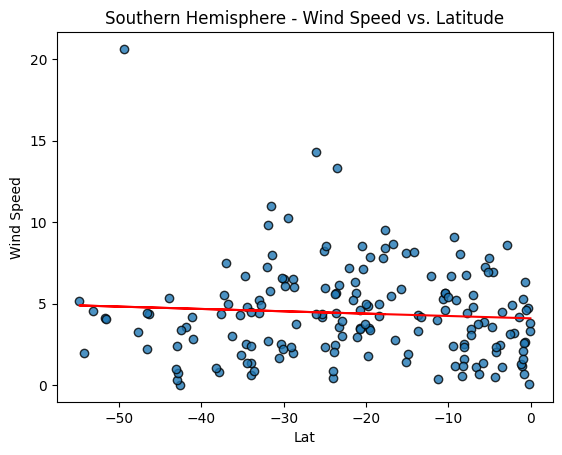

In [43]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Southern Hemisphere - Wind Speed vs. Latitude", "Lat", "Wind Speed", (10, 270))


**Discussion about the linear relationship:** YOUR RESPONSE HERE